In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [3]:
coco=pd.read_excel("A:/Data Science/assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx")


In [4]:
coco.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [162]:
coco.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [163]:
coco.shape

(42, 2)

<Figure size 864x432 with 0 Axes>

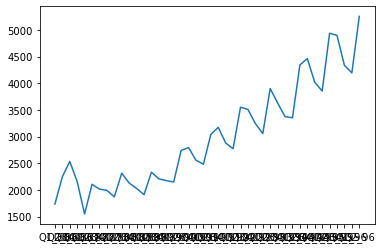

<Figure size 864x432 with 0 Axes>

In [5]:
plt.plot(coco.Quarter,coco.Sales)
plt.figure(figsize=(12,6))

In [6]:
t=np.arange(1,43)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [7]:
coco['X']=t

In [8]:
coco.head()

,Quarter,Sales,X
0,Q1_86,1734.827000,1
1,Q2_86,2244.960999,2
2,Q3_86,2533.804993,3
3,Q4_86,2154.962997,4
4,Q1_87,1547.818996,5


<Figure size 864x432 with 0 Axes>

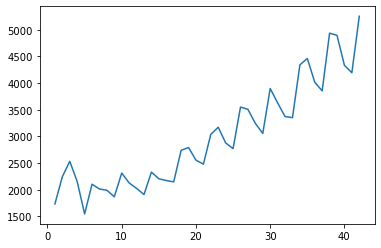

<Figure size 864x432 with 0 Axes>

In [9]:
plt.plot(coco.X,coco.Sales)
plt.figure(figsize=(12,6))

In [10]:
train=coco.iloc[0:35]
test=coco.iloc[35:43,]

In [11]:
test.X

35    36
36    37
37    38
38    39
39    40
40    41
41    42
Name: X, dtype: int32

In [12]:
#Applying Linear model
import statsmodels.formula.api as smf
linear_model=smf.ols('Sales~X',data=train).fit()
predict_linear=pd.Series(linear_model.predict(test.X))
rmse_linear=np.sqrt(np.mean((test.Sales-predict_linear)**2))

In [13]:
rmse_linear

636.5072930351143

In [14]:
#Applying Exponential model
coco['log']=np.log(coco.Sales)
train=coco.iloc[0:35]
test=coco.iloc[35:43,]


In [15]:
exp_model=smf.ols('log~X',data=train).fit()
exp_predict=pd.Series(exp_model.predict(test.X))
rmse_exp=np.sqrt(np.mean((test.Sales-np.exp(exp_predict))**2))
rmse_exp

493.34864848421216

In [16]:
#Applying Quadratic model
X2=t*t
coco['X2']=X2
train=coco.iloc[0:35]
test=coco.iloc[35:43,]

In [17]:
Quad=smf.ols('Sales~X+X2',data=train).fit()
pred_quad=pd.Series(Quad.predict(test[['X','X2']]))
rmse_quad=np.sqrt(np.mean((test.Sales-(pred_quad))**2))
rmse_quad

511.811731941759

In [18]:
Quarter=[]
year=[]
for i in range (0,42):
    Q1,y1=coco.Quarter[i].split("_")
    Quarter.append(Q1)
    year.append(y1)

In [19]:
Quarter=pd.Series(Quarter)
year=pd.Series(year)
type(year)

pandas.core.series.Series

In [20]:
z=pd.concat([Quarter,year],axis=1)

In [21]:
z.rename(columns={0:'Quarter',1:'year'},inplace=True)

In [22]:
c=pd.get_dummies(Quarter)

In [23]:
coco_2=pd.concat([coco,z,c],axis=1)

In [24]:
coco_2

,Quarter,Sales,X,log,X2,Quarter,year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,7.458663,1,Q1,86,1,0,0,0
1,Q2_86,2244.960999,2,7.716443,4,Q2,86,0,1,0,0
2,Q3_86,2533.804993,3,7.837477,9,Q3,86,0,0,1,0
3,Q4_86,2154.962997,4,7.675529,16,Q4,86,0,0,0,1
4,Q1_87,1547.818996,5,7.344602,25,Q1,87,1,0,0,0
5,Q2_87,2104.411995,6,7.651791,36,Q2,87,0,1,0,0
6,Q3_87,2014.362999,7,7.608058,49,Q3,87,0,0,1,0
7,Q4_87,1991.746998,8,7.596767,64,Q4,87,0,0,0,1
8,Q1_88,1869.049999,9,7.533186,81,Q1,88,1,0,0,0
9,Q2_88,2313.631996,10,7.746574,100,Q2,88,0,1,0,0


In [25]:
train=coco_2.iloc[0:35]
test=coco_2.iloc[35:43,]

In [28]:
#Addtive Seasonality
add_sea=smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
predict_add=pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_error_add=np.sqrt(np.mean((test.Sales-(predict_add))**2))
rmse_error_add

1861.8704164251742

In [29]:
#Addtive Seasonality with linear trend
add_sea_linear=smf.ols('Sales~X+Q1+Q2+Q3+Q4',data=train).fit()
predict_add_linear=pd.Series(add_sea_linear.predict(test[['Q1','Q2','Q3','Q4','X']]))
rmse_error_adlin1=np.sqrt(np.mean((test.Sales-(predict_add_linear))**2))
rmse_error_adlin1

559.693395141309

In [31]:
#Addtive Seasonality with quadratic
add_seaQuad=smf.ols('Sales~Q1+Q2+Q3+Q4+X+X2',data=train).fit()
predict_Quadadd=add_sea.predict(test[['Q1','Q2','Q3','Q4','X','X2']])
rmse_error_adQa=np.sqrt(np.mean((test.Sales-(predict_Quadadd))**2))
rmse_error_adQa

1861.8704164251742

In [32]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log~Q1+Q2+Q3+Q4',data = train).fit()
predict_multi=Mul_sea.predict(test[['Q1','Q2','Q3','Q4']])
rmse_exp_multi=np.sqrt(np.mean((test.Sales-np.exp(predict_multi))**2))
rmse_exp_multi
#rmse_error

1938.9332351966111

In [33]:
#Multiplicative Seasonality with linear trend
Mul_sea = smf.ols('log~X+Q1+Q2+Q3+Q4',data = train).fit()
predict_multi_1=Mul_sea.predict(test[['Q1','Q2','Q3','Q4','X']])
rmse_exp_mullinear=np.sqrt(np.mean((test.Sales-np.exp(predict_multi_1))**2))
rmse_exp_mullinear
#rmse_error

339.1874666994819

In [34]:
#Multiplicative Seasonality with quadratic trend
Mul_sea = smf.ols('log~X+X2+Q1+Q2+Q3+Q4',data = train).fit()
predict_multi_2=Mul_sea.predict(test[['Q1','Q2','Q3','Q4','X','X2']])
rmse_exp_multiQuad=np.sqrt(np.mean((test.Sales-np.exp(predict_multi_2))**2))
rmse_exp_multiQuad
#rmse_error

673.4116235708701

In [35]:
data={'Model':pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_error_add','rmse_error_adlin1','rmse_error_adQa','rmse_exp_multi','rmse_exp_mullinear','rmse_exp_multiQuad']),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_error_add,rmse_error_adlin1,rmse_error_adQa,rmse_exp_multi,rmse_exp_mullinear,rmse_exp_multiQuad])}
table=pd.DataFrame(data)
table

,Model,RMSE_Values
0,rmse_linear,636.507293
1,rmse_exp,493.348648
2,rmse_quad,511.811732
3,rmse_error_add,1861.870416
4,rmse_error_adlin1,559.693395
5,rmse_error_adQa,1861.870416
6,rmse_exp_multi,1938.933235
7,rmse_exp_mullinear,339.187467
8,rmse_exp_multiQuad,673.411624


In [ ]:
#Best model is Multiplicative linear trend as the rmse value is less compared to other model 339

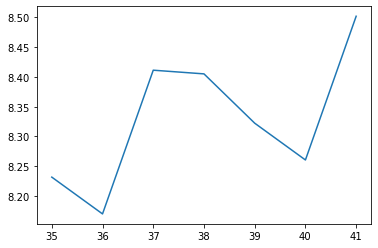

In [36]:
#train.Sales.plot()
predict_multi_1.plot()

In [221]:
#df=pd.concat([train,predict_multi_1],axis=0)
train

,Quarter,Sales,X,log,X2,Quarter,year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,7.458663,1,Q1,86,1,0,0,0
1,Q2_86,2244.960999,2,7.716443,4,Q2,86,0,1,0,0
2,Q3_86,2533.804993,3,7.837477,9,Q3,86,0,0,1,0
3,Q4_86,2154.962997,4,7.675529,16,Q4,86,0,0,0,1
4,Q1_87,1547.818996,5,7.344602,25,Q1,87,1,0,0,0
5,Q2_87,2104.411995,6,7.651791,36,Q2,87,0,1,0,0
6,Q3_87,2014.362999,7,7.608058,49,Q3,87,0,0,1,0
7,Q4_87,1991.746998,8,7.596767,64,Q4,87,0,0,0,1
8,Q1_88,1869.049999,9,7.533186,81,Q1,88,1,0,0,0
9,Q2_88,2313.631996,10,7.746574,100,Q2,88,0,1,0,0


In [225]:
z=np.exp(predict_multi_1)

In [109]:
predicted_data=coco.iloc[0:35,0:2]
predicted_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [110]:
coco.iloc[35:42,0]

35    Q4_94
36    Q1_95
37    Q2_95
38    Q3_95
39    Q4_95
40    Q1_96
41    Q2_96
Name: Quarter, dtype: object

In [131]:
pred_values=coco.iloc[35:42,0]
pred_values

35    Q4_94
36    Q1_95
37    Q2_95
38    Q3_95
39    Q4_95
40    Q1_96
41    Q2_96
Name: Quarter, dtype: object

In [132]:
#values=np.exp(predict_multi_1)
#values.rename({'0':'Values'})
values

35    3758.015576
36    3532.765388
37    4497.598919
38    4469.835753
39    4114.535760
40    3867.916252
41    4924.282834
dtype: float64

In [134]:
pred_values=pd.concat([pred_values,values],axis=1)

#pred_values.drop(pred_values.columns[1],axis=1,inplace=True)
pred_values

,Quarter,0
35,Q4_94,3758.015576
36,Q1_95,3532.765388
37,Q2_95,4497.598919
38,Q3_95,4469.835753
39,Q4_95,4114.535760
40,Q1_96,3867.916252
41,Q2_96,4924.282834


In [135]:
pred_values.rename(columns={0:'Sales'},inplace=True)
pred_values

,Quarter,Sales
35,Q4_94,3758.015576
36,Q1_95,3532.765388
37,Q2_95,4497.598919
38,Q3_95,4469.835753
39,Q4_95,4114.535760
40,Q1_96,3867.916252
41,Q2_96,4924.282834


In [107]:
predicted_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [137]:
predicted_data=pd.concat([predicted_data,pred_values],axis=0)
predicted_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


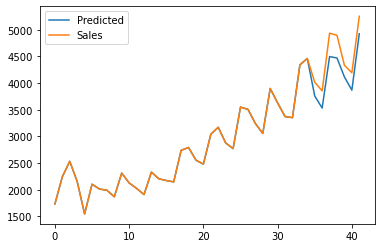

In [148]:
predicted_data.Sales.plot(kind='line',label='Predicted')

coco.Sales.plot(kind='line')
plt.legend()

In [ ]:
#Created 4 dummy variables for the 4 quarters and 2 for the trend t and t^2.
#Used a model based forecasting for coco cola datset 
#Best model is Multiplicative linear trend as the rmse value is less compared to other model 339